## Get dataset statistics
\textbf{Total samples}  & \textbf{Sample length} & \textbf{Total entities} & \textbf{Entity count}

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [2]:
files = {
    "lowner": {
        "train":
        os.path.join(thesis_path, "data", "mlowner", "lowner_train.json"),
        "dev":
        os.path.join(thesis_path, "data", "mlowner", "lowner_dev.json"),
        "test":
        os.path.join(thesis_path, "data", "mlowner", "lowner_test.json"),
        "gazetteer":
        os.path.join(thesis_path, "data", "mlowner", "lowner_gazetteer.json")
    },
    "multiconer": {
        "test":
        os.path.join(thesis_path, "data", "multiconer",
                     "multiconer_test.json")
    },
    "wnut": {
        "train": os.path.join(thesis_path, "data", "wnut", "wnut_train.json"),
        "dev": os.path.join(thesis_path, "data", "wnut", "wnut_dev.json"),
        "test": os.path.join(thesis_path, "data", "wnut", "wnut_test.json")
    }
}

In [3]:
from evaluations.datasets_00 import get_dataset_stats_df

dataset_stats_df = get_dataset_stats_df(files)


/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset_stats_df

,dataset,total samples,sample len avg,sample len std,total entities,entity count avg,entity count std,person,group,corporation,location,creative-work,product
0,lowner_train,13423,15.404232,6.356497,17368,1.293899,1.026238,5412,2525,789,6196,1960,486
1,lowner_dev,3366,15.344920,6.280718,4338,1.288770,1.017720,1282,635,177,1625,515,104
2,lowner_test,33661,15.339354,6.280033,43716,1.298714,1.025310,13375,6477,2033,15871,4795,1165
3,lowner_gazetteer,3773535,2.507388,1.327975,3773535,1.000000,0.000000,1797893,227833,72106,1118002,490584,67117
4,multiconer_test,217818,10.000955,7.508002,272922,1.252982,0.659578,55682,41156,37435,59082,42781,36786
5,wnut_train,3394,18.482616,7.474556,1975,0.581909,0.959500,660,264,221,548,140,142
6,wnut_dev,1009,15.592666,10.800940,836,0.828543,0.828161,470,39,34,74,105,114
7,wnut_test,1287,18.177156,14.372180,1079,0.838384,1.053906,429,165,66,150,142,127


In [ ]:
dataset_stats_df["dataset"].tolist()

['lowner_train',
 'lowner_dev',
 'lowner_test',
 'lowner_gazetteer',
 'multiconer_test',
 'wnut_train',
 'wnut_dev',
 'wnut_test']

In [5]:
dataset_stats_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "00_dataset_stats.pkl.tar.gz"))

In [6]:
# first table to latex
from evaluations.utils import LATEX_DATASET_NAMES
from evaluations.utils import get_dataset_stats_totals_correct_latex_format
print(get_dataset_stats_totals_correct_latex_format(dataset_stats_df))


\begin{tabular}{@{}llSS[table-format = 2.2 (2)]SS[table-format = 2.2 (2)]@{}}
\toprule
{} & {Total samples} & {Sample length} & {Total entities} & {Entity count} \\
{Dataset} & {} & {} & {} & {} \\
\midrule
LOWNER\textsubscript{train} & 13423 & 15.40 (636) & 17368 & 1.29 (103) \\
LOWNER\textsubscript{dev} & 3366 & 15.34 (628) & 4338 & 1.29 (102) \\
LOWNER\textsubscript{test} & 33661 & 15.34 (628) & 43716 & 1.30 (103) \\
LOWNER\textsubscript{gazetteer} & 3773535 & 2.51 (133) & 3773535 & 1.00 (0) \\
MultiCoNER\textsubscript{test} & 217818 & 10.00 (751) & 272922 & 1.25 (66) \\
WNUT-17\textsubscript{train} & 3394 & 18.48 (747) & 1975 & 0.58 (96) \\
WNUT-17\textsubscript{dev} & 1009 & 15.59 (1080) & 836 & 0.83 (83) \\
WNUT-17\textsubscript{test} & 1287 & 18.18 (1437) & 1079 & 0.84 (105) \\
\bottomrule
\end{tabular}



/home/loebbert/projects/thesis/evaluations/utils.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Dataset"] = major_df["dataset"].apply(
/home/loebbert/projects/thesis/evaluations/utils.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Total samples"] = major_df["total samples"]
/home/loebbert/projects/thesis/evaluations/utils.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [23]:
# second table per type
from evaluations.utils import ENTITY_NAMES
type_df = dataset_stats_df[[
    "dataset", *ENTITY_NAMES.keys()
]]
type_df["Dataset"] = type_df["dataset"].apply(
    lambda x: LATEX_DATASET_NAMES[x])
for entity_type, entity_name in ENTITY_NAMES.items():
    type_df[entity_name] = type_df[entity_type]

type_df.set_index("Dataset", inplace=True)

print(type_df[[*ENTITY_NAMES.values()]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}lSSSSSS@{}"))

\begin{tabular}{@{}lSSSSSS@{}}
\toprule
{} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{Dataset} & {} & {} & {} & {} & {} & {} \\
\midrule
LOWNER\textsubscript{train} & 5412 & 6196 & 2525 & 789 & 1960 & 486 \\
LOWNER\textsubscript{dev} & 1282 & 1625 & 635 & 177 & 515 & 104 \\
LOWNER\textsubscript{test} & 13375 & 15871 & 6477 & 2033 & 4795 & 1165 \\
LOWNER\textsubscript{gazetteer} & 1797893 & 1118002 & 227833 & 72106 & 490584 & 67117 \\
MultiCoNER\textsubscript{test} & 55682 & 59082 & 41156 & 37435 & 42781 & 36786 \\
WNUT-17\textsubscript{train} & 660 & 548 & 264 & 221 & 140 & 142 \\
WNUT-17\textsubscript{dev} & 470 & 74 & 39 & 34 & 105 & 114 \\
WNUT-17\textsubscript{test} & 429 & 150 & 165 & 66 & 142 & 127 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_22255/3633384489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df["Dataset"] = type_df["dataset"].apply(
/tmp/ipykernel_22255/3633384489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df[entity_name] = type_df[entity_type]
/tmp/ipykernel_22255/3633384489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

## Get EECR and Top-1 Cosine Similarity for each dataset

In [ ]:
from data_metrics.sample_similarity import confusion_matrix_sample_similarity
import json

datasets = []
dataset_names = []
for dataset, split in files.items():
    for part, filepath in split.items():
        if part == "gazetteer" or dataset == "multiconer":
            continue
        with open(filepath) as file:
            samples = json.load(file)
        datasets.append(samples)
        dataset_names.append("_".join([dataset, part]))

conf_matrix_sample_sim = confusion_matrix_sample_similarity(datasets=datasets, names=dataset_names)
conf_matrix_sample_sim.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "00_datasets_conf_matrix_sample_sim.pkl.tar.gz"))

In [27]:
import pandas as pd

conf_matrix_sample_sim = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_sample_sim.pkl.tar.gz"))
conf_matrix_sample_sim

,first,second,context_type,data_id,cosine_similarity
0,lowner_train,lowner_train,full,lowner_train_0,1.0
1,lowner_train,lowner_train,full,lowner_train_1,1.0
2,lowner_train,lowner_train,full,lowner_train_2,1.0
3,lowner_train,lowner_train,full,lowner_train_3,1.0
4,lowner_train,lowner_train,full,lowner_train_4,1.0
...,...,...,...,...,...
392975,wnut_test,wnut_test,full,wnut_test_1282,1.0
392976,wnut_test,wnut_test,full,wnut_test_1283,1.0
392977,wnut_test,wnut_test,full,wnut_test_1284,1.0
392978,wnut_test,wnut_test,full,wnut_test_1285,1.0


In [28]:
conf_matrix = conf_matrix_sample_sim.pivot_table("cosine_similarity",
                                                 index=["first", "second"],
                                                 aggfunc="mean").reset_index()
conf_matrix_list = conf_matrix.to_dict(orient="records")

In [29]:
from itertools import product
import pandas as pd
import numpy as np

for left, right in list(product(["lowner_gazetteer", "multiconer_test"], [
    'lowner_dev', 'lowner_test', 'lowner_train', 'wnut_dev', 'wnut_test',
    'wnut_train'
])):
    conf_matrix_list.append({"first": left, "second": right, "cosine_similarity": np.nan})
    conf_matrix_list.append({
        "first": right,
        "second": left,
        "cosine_similarity": np.nan
    })

conf_matrix = pd.DataFrame.from_records(conf_matrix_list)
conf_matrix


,first,second,cosine_similarity
0,lowner_dev,lowner_dev,1.000000
1,lowner_dev,lowner_test,0.509971
2,lowner_dev,lowner_train,0.509533
3,lowner_dev,wnut_dev,0.355700
4,lowner_dev,wnut_test,0.350367
5,lowner_dev,wnut_train,0.347444
6,lowner_test,lowner_dev,0.597666
7,lowner_test,lowner_test,0.999970
8,lowner_test,lowner_train,0.596669
9,lowner_test,wnut_dev,0.424612


In [30]:
conf_matrix_df = conf_matrix.pivot_table(values="cosine_similarity", index="first", columns="second", dropna=False)
conf_matrix_df

second,lowner_dev,lowner_gazetteer,lowner_test,lowner_train,multiconer_test,wnut_dev,wnut_test,wnut_train
first,,,,,,,,
lowner_dev,1.000000,NaN,0.509971,0.509533,NaN,0.355700,0.350367,0.347444
lowner_gazetteer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lowner_test,0.597666,NaN,0.999970,0.596669,NaN,0.424612,0.417165,0.413057
lowner_train,0.565342,NaN,0.563979,1.000000,NaN,0.394530,0.388323,0.389493
multiconer_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wnut_dev,0.322268,NaN,0.321725,0.320629,NaN,1.000000,0.348077,0.391779
wnut_test,0.334780,NaN,0.331989,0.331634,NaN,0.374799,1.000000,0.444991
wnut_train,0.346594,NaN,0.346341,0.345203,NaN,0.402929,0.411325,1.000000


In [31]:
from evaluations.utils import PLOT_DATASET_NAMES, DATASET_ORDER

sorted_matrix_df = conf_matrix_df.reset_index()
sorted_matrix_df.sort_values(
    "first", key=lambda x: x.apply(lambda y: DATASET_ORDER.get(y, 1000)), inplace=True)
sorted_matrix_df["first"] = sorted_matrix_df["first"].map(
    lambda x: PLOT_DATASET_NAMES[x])
sorted_matrix_df.columns = sorted_matrix_df.columns.map(
    lambda x: PLOT_DATASET_NAMES[x] if x in PLOT_DATASET_NAMES else "First")
sorted_matrix_df.columns.name = "Second"
sorted_matrix_df.set_index("First", inplace=True)
sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]]

Second,LOWNER$_{train}$,LOWNER$_{dev}$,LOWNER$_{test}$,LOWNER$_{gazetteer}$,MultiCoNER$_{test}$,WNUT-17$_{train}$,WNUT-17$_{dev}$,WNUT-17$_{test}$
First,,,,,,,,
LOWNER$_{train}$,1.000000,0.565342,0.563979,NaN,NaN,0.389493,0.394530,0.388323
LOWNER$_{dev}$,0.509533,1.000000,0.509971,NaN,NaN,0.347444,0.355700,0.350367
LOWNER$_{test}$,0.596669,0.597666,0.999970,NaN,NaN,0.413057,0.424612,0.417165
LOWNER$_{gazetteer}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiCoNER$_{test}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WNUT-17$_{train}$,0.345203,0.346594,0.346341,NaN,NaN,1.000000,0.402929,0.411325
WNUT-17$_{dev}$,0.320629,0.322268,0.321725,NaN,NaN,0.391779,1.000000,0.348077
WNUT-17$_{test}$,0.331634,0.334780,0.331989,NaN,NaN,0.444991,0.374799,1.000000


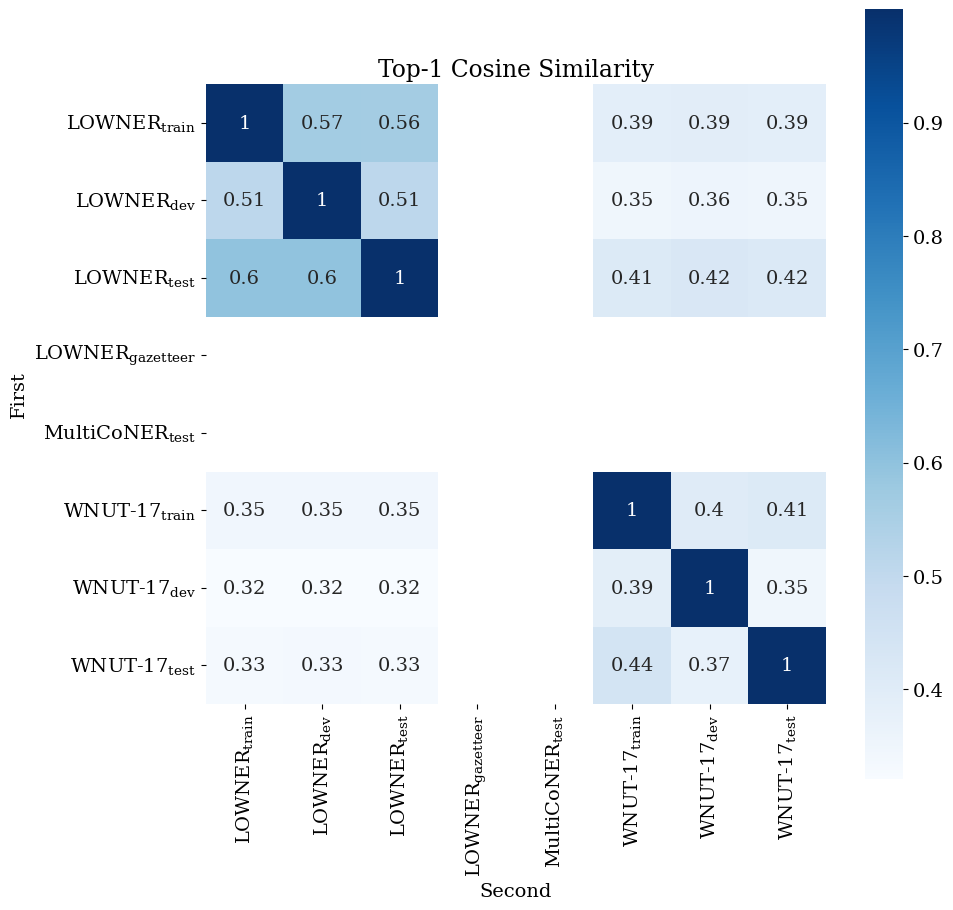

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]],
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True), square=True)
plt.title("Top-1 Cosine Similarity")
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(
    os.path.dirname(
        os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                     "top-1-cosine-sim.png")), exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                         "top-1-cosine-sim.png"),bbox_inches="tight",
            dpi=200)

# Get EECR

In [3]:
from data_metrics.entity_coverage_ratio import confusion_matrix_expected_entity_coverage_ratio
import json

datasets = []
dataset_names = []
for dataset, split in files.items():
    for part, filepath in split.items():
        with open(filepath) as file:
            samples = json.load(file)
        datasets.append(samples)
        dataset_names.append("_".join([dataset, part]))

conf_matrix_eecr = confusion_matrix_expected_entity_coverage_ratio(datasets, dataset_names)
conf_matrix_eecr.to_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_eecr.pkl.tar.gz"))


KeyboardInterrupt: 

In [26]:
import pandas as pd

conf_matrix_eecr = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_eecr.pkl.tar.gz"))
conf_matrix_eecr

,first,second,expected_entity_coverage_ratio
0,lowner_train,lowner_train,0.9948
1,lowner_train,lowner_dev,0.2957
2,lowner_train,lowner_test,0.2930
3,lowner_train,lowner_gazetteer,0.0059
4,lowner_train,multiconer_test,0.1451
...,...,...,...
59,wnut_test,lowner_gazetteer,0.0003
60,wnut_test,multiconer_test,0.0069
61,wnut_test,wnut_train,0.0137
62,wnut_test,wnut_dev,0.0831


In [27]:
conf_matrix_df = conf_matrix_eecr.pivot_table(
    values="expected_entity_coverage_ratio",
    index="first",
    columns="second",
    dropna=False)
conf_matrix_df

second,lowner_dev,lowner_gazetteer,lowner_test,lowner_train,multiconer_test,wnut_dev,wnut_test,wnut_train
first,,,,,,,,
lowner_dev,0.9973,0.0018,0.1747,0.1713,0.0736,0.0443,0.0408,0.0759
lowner_gazetteer,0.8330,0.9856,0.8349,0.8382,0.8956,0.3302,0.2948,0.4132
lowner_test,0.3892,0.0122,0.9920,0.3865,0.2099,0.1265,0.1089,0.2050
lowner_train,0.2957,0.0059,0.2930,0.9948,0.1451,0.0703,0.0815,0.1497
multiconer_test,0.4930,0.0580,0.4958,0.4929,0.9906,0.1508,0.1414,0.2498
wnut_dev,0.0235,0.0003,0.0204,0.0190,0.0066,0.9907,0.0785,0.0197
wnut_test,0.0173,0.0003,0.0194,0.0166,0.0069,0.0831,0.9889,0.0137
wnut_train,0.0543,0.0007,0.0516,0.0492,0.0211,0.0311,0.0185,0.9920


In [28]:
from evaluations.utils import PLOT_DATASET_NAMES, DATASET_ORDER

sorted_matrix_df = conf_matrix_df.reset_index()
sorted_matrix_df.sort_values(
    "first",
    key=lambda x: x.apply(lambda y: DATASET_ORDER.get(y, 1000)),
    inplace=True)
sorted_matrix_df["first"] = sorted_matrix_df["first"].map(
    lambda x: PLOT_DATASET_NAMES[x])
sorted_matrix_df.columns = sorted_matrix_df.columns.map(
    lambda x: PLOT_DATASET_NAMES[x] if x in PLOT_DATASET_NAMES else "First")
sorted_matrix_df.columns.name = "Second"
sorted_matrix_df.set_index("First", inplace=True)
sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]]

Second,LOWNER$_{train}$,LOWNER$_{dev}$,LOWNER$_{test}$,LOWNER$_{gazetteer}$,MultiCoNER$_{test}$,WNUT-17$_{train}$,WNUT-17$_{dev}$,WNUT-17$_{test}$
First,,,,,,,,
LOWNER$_{train}$,0.9948,0.2957,0.2930,0.0059,0.1451,0.1497,0.0703,0.0815
LOWNER$_{dev}$,0.1713,0.9973,0.1747,0.0018,0.0736,0.0759,0.0443,0.0408
LOWNER$_{test}$,0.3865,0.3892,0.9920,0.0122,0.2099,0.2050,0.1265,0.1089
LOWNER$_{gazetteer}$,0.8382,0.8330,0.8349,0.9856,0.8956,0.4132,0.3302,0.2948
MultiCoNER$_{test}$,0.4929,0.4930,0.4958,0.0580,0.9906,0.2498,0.1508,0.1414
WNUT-17$_{train}$,0.0492,0.0543,0.0516,0.0007,0.0211,0.9920,0.0311,0.0185
WNUT-17$_{dev}$,0.0190,0.0235,0.0204,0.0003,0.0066,0.0197,0.9907,0.0785
WNUT-17$_{test}$,0.0166,0.0173,0.0194,0.0003,0.0069,0.0137,0.0831,0.9889


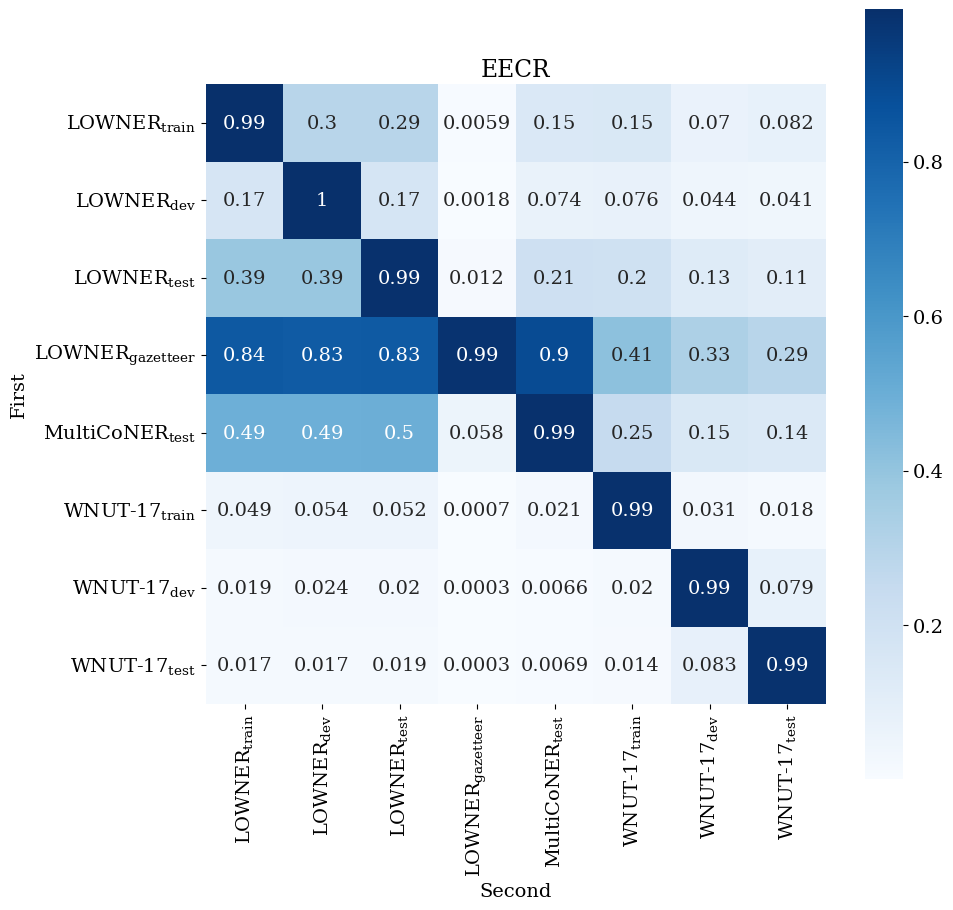

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]],
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True), square=True)
plt.title("EECR")
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(os.path.dirname(
    os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                 "eecr.png")),
            exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                         "eecr.png"),
            bbox_inches="tight",
            dpi=200)

# Get gazetteer EECR + ECR + Search Score for Lowner test + WNUT test 

In [2]:
from evaluations.datasets_00 import get_labeled_data_entity_coverage, get_labeled_data_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics, get_search_results_entity_coverage_per_sample

labeled_data_eecr_df = get_labeled_data_entity_coverage()
labeled_data_eecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_eecr_sample_df = aggregate_per_sample_eecr_metrics(
    labeled_data_eecr_sample_df)
search_results_data_eecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_eecr = aggregate_per_sample_eecr_metrics(
    search_results_data_eecr)


/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
eecr_table = agg_labeled_data_eecr_sample_df.set_index(["model", "dataset"]).join(
    agg_search_results_data_eecr.set_index(["model", "dataset"]),
    on=["model", "dataset"],
    lsuffix="_labeled_data_per_sample",
    rsuffix="_search_results").join(
        labeled_data_eecr_df[["model", "dataset",
                              "eecr"]].set_index(["model", "dataset"]),
        on=["model", "dataset"]).reset_index()
eecr_table.head()

/tmp/ipykernel_40353/329368113.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  eecr_table = agg_labeled_data_eecr_sample_df.set_index(["model", "dataset"]).join(


,model,dataset,"(eecr_labeled_data_per_sample, mean)","(eecr_labeled_data_per_sample, std)","(eecr_search_results, mean)","(eecr_search_results, std)",eecr
0,t5_asp_gaz,lowner_dev,0.387036,0.445786,0.322956,0.430180,0.478869
1,t5_asp_gaz,lowner_test,0.391938,0.445369,0.328115,0.430403,0.480894
2,t5_asp_gaz,lowner_train,0.389314,0.443670,0.325552,0.429781,0.478490
3,t5_asp_gaz,wnut_dev,0.096506,0.276921,0.067641,0.239158,0.147727
4,t5_asp_gaz,wnut_test,0.074618,0.238987,0.054267,0.210295,0.139635


In [4]:
eecr_table.columns.tolist()

['model',
 'dataset',
 ('eecr_labeled_data_per_sample', 'mean'),
 ('eecr_labeled_data_per_sample', 'std'),
 ('eecr_search_results', 'mean'),
 ('eecr_search_results', 'std'),
 'eecr']

In [5]:
from evaluations.utils import LATEX_DATASET_NAMES, PLOT_SEARCH_NAMES, merge_mean_std, DATASET_ORDER, MODEL_ORDER

major_df = eecr_table[[
    "dataset",
    "model",
    "eecr",
    ('eecr_labeled_data_per_sample', 'mean'),
    ('eecr_labeled_data_per_sample', 'std'),
    ('eecr_search_results', 'mean'),
    ('eecr_search_results', 'std'),
]]
def sort_dataset_model(cell):
    if cell in DATASET_ORDER:
        return DATASET_ORDER.get(cell, 1000)
    elif cell in MODEL_ORDER:
        return MODEL_ORDER.get(cell, 1000)
    return 1000


round_last_digits = 4
major_df.sort_values(["dataset", "model"],
                     key=lambda x: x.apply(sort_dataset_model),
                     inplace=True)
major_df["Dataset"] = major_df["dataset"].apply(
    lambda x: LATEX_DATASET_NAMES[x])
major_df["Search"] = major_df["model"].apply(lambda x: PLOT_SEARCH_NAMES[x])
major_df["EECR labeled data"] = round(major_df["eecr"], round_last_digits).astype(str)
major_df["EECR labeled data per sample"] = merge_mean_std(
    major_df, ('eecr_labeled_data_per_sample', 'mean'),
    ('eecr_labeled_data_per_sample', 'std'),
    precision=round_last_digits)
major_df["EECR search results per sample"] = merge_mean_std(
    major_df, ('eecr_search_results', 'mean'), ('eecr_search_results', 'std'),
    precision=round_last_digits)

print_df = major_df[major_df["dataset"].isin(["lowner_train", "lowner_dev", "lowner_test"])].set_index(["Dataset", "Search"])
print(print_df[[
    "EECR labeled data", "EECR labeled data per sample",
    "EECR search results per sample"
]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}ll|S[table-format = 1.4, group-minimum-digits=5]|*2{S[table-format = 1.4 (2), group-minimum-digits=5]}@{}"
))


\begin{tabular}{@{}ll|S[table-format = 1.4, group-minimum-digits=5]|*2{S[table-format = 1.4 (2), group-minimum-digits=5]}@{}}
\toprule
{} & {} & {EECR labeled data} & {EECR labeled data per sample} & {EECR search results per sample} \\
{Dataset} & {Search} & {} & {} & {} \\
\midrule
\multirow[t]{5}{*}{LOWNER\textsubscript{train}} & Gaz & 0.4785 & 0.3893 (4437) & 0.3256 (4298) \\
 & Sent & 0.4847 & 0.3934 (4493) & 0.2075 (3768) \\
 & LownerGaz & 0.8382 & 0.7035 (4131) & 0.5097 (4641) \\
 & Gaz+Sent & 0.4918 & 0.3998 (4508) & 0.3507 (4385) \\
 & LownerGaz+Sent & 0.8714 & 0.7296 (4110) & 0.5320 (4602) \\
\multirow[t]{5}{*}{LOWNER\textsubscript{dev}} & Gaz & 0.4789 & 0.3870 (4458) & 0.3230 (4302) \\
 & Sent & 0.484 & 0.3892 (4512) & 0.2028 (3727) \\
 & LownerGaz & 0.833 & 0.7007 (4134) & 0.5088 (4638) \\
 & Gaz+Sent & 0.4921 & 0.3970 (4530) & 0.3465 (4383) \\
 & LownerGaz+Sent & 0.8717 & 0.7291 (4115) & 0.5352 (4589) \\
\multirow[t]{5}{*}{LOWNER\textsubscript{test}} & Gaz & 0.4809 & 0.3919

## ECR values

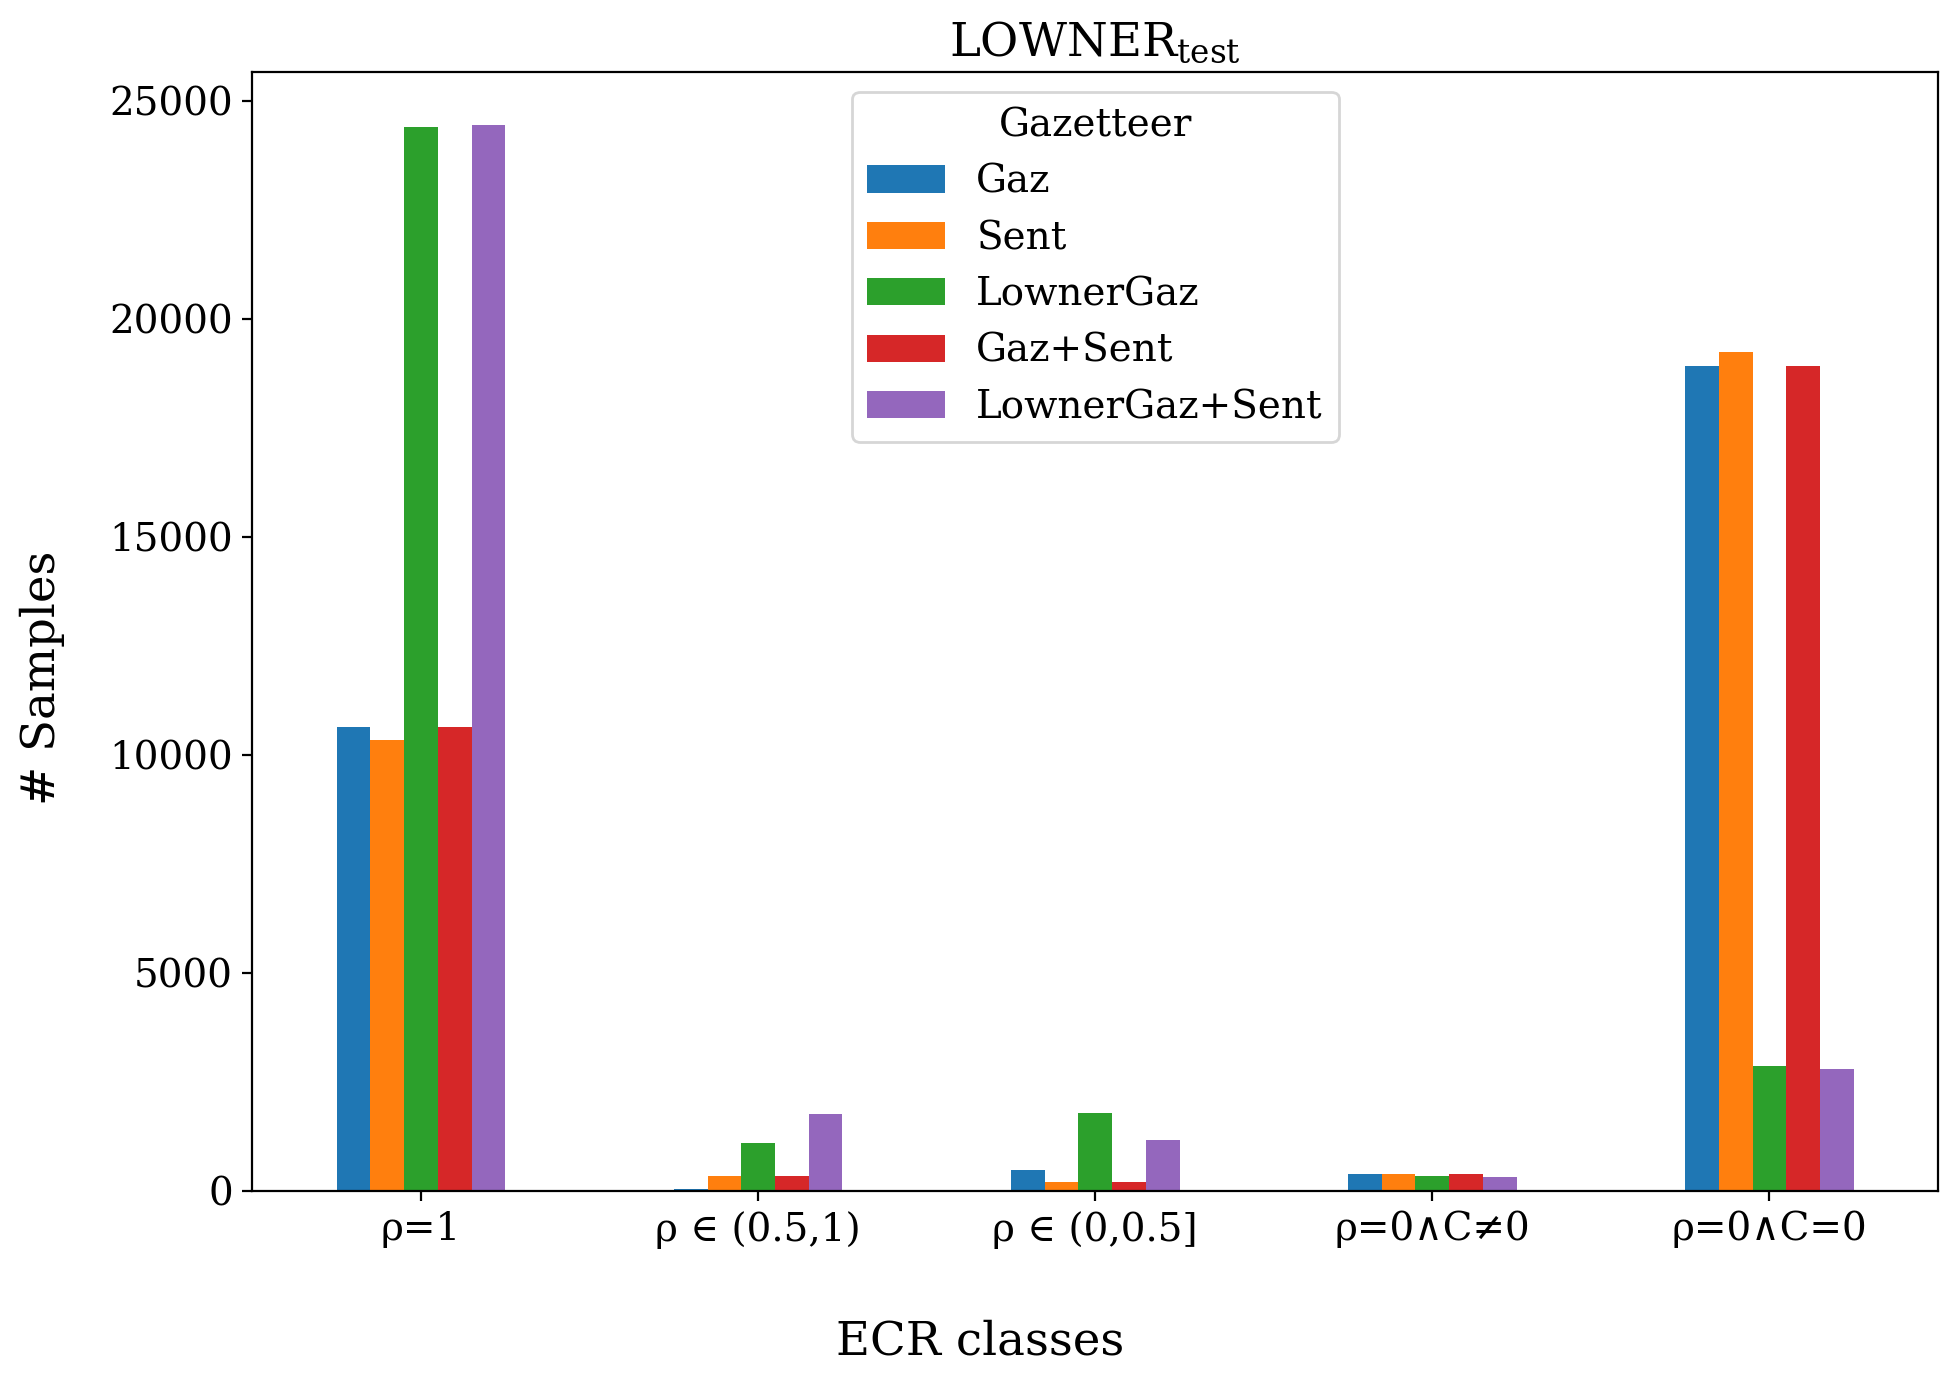

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from evaluations.utils import PLOT_SEARCH_NAMES, MODEL_ORDER
from evaluations.datasets_00 import get_labeled_data_entity_coverage


def get_ecr_plotable_table(ecr_df: pd.DataFrame, dataset: str):
    plt_ecr_df = ecr_df[ecr_df["dataset"] ==
                        dataset].loc[:,
                                     ~ecr_df.columns.isin(["eecr", "dataset"])]
    plt_ecr_df = plt_ecr_df.sort_values(
        "model", key=lambda x: x.apply(lambda y: MODEL_ORDER.get(y, 1000)))
    plt_ecr_df["Gazetteer"] = plt_ecr_df["model"].apply(
        lambda x: PLOT_SEARCH_NAMES[x])
    plt_ecr_df = plt_ecr_df.set_index("Gazetteer")
    return plt_ecr_df.loc[:, ~plt_ecr_df.columns.isin(["model"])].T


labeled_data_ecr_df = get_labeled_data_entity_coverage()

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 7), dpi=200)
#get_ecr_plotable_table(labeled_data_ecr_df,
#                       "lowner_train").plot(kind="bar",
#                                           rot=0.0,
#                                           title=r"LOWNER$_{train}$",
#                                           ax=ax[0, 0])
#get_ecr_plotable_table(labeled_data_ecr_df,
#                       "lowner_dev").plot(kind="bar",
#                                           rot=0.0,
#                                           title=r"LOWNER$_{dev}$",
#                                           ax=ax[0, 1])
get_ecr_plotable_table(labeled_data_ecr_df,
                       "lowner_test").plot(kind="bar",
                                           rot=0.0,
                                           title=r"LOWNER$_{test}$",
                                           ax=ax)
#ax[1, 1].set_axis_off()

fig.supylabel("# Samples")
fig.supxlabel("ECR classes")
plt.tight_layout()
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance",
                         "ecr_labeled_data.png"),
            dpi=300,
            bbox_inches='tight')


# Gazetteer ECR per sample values

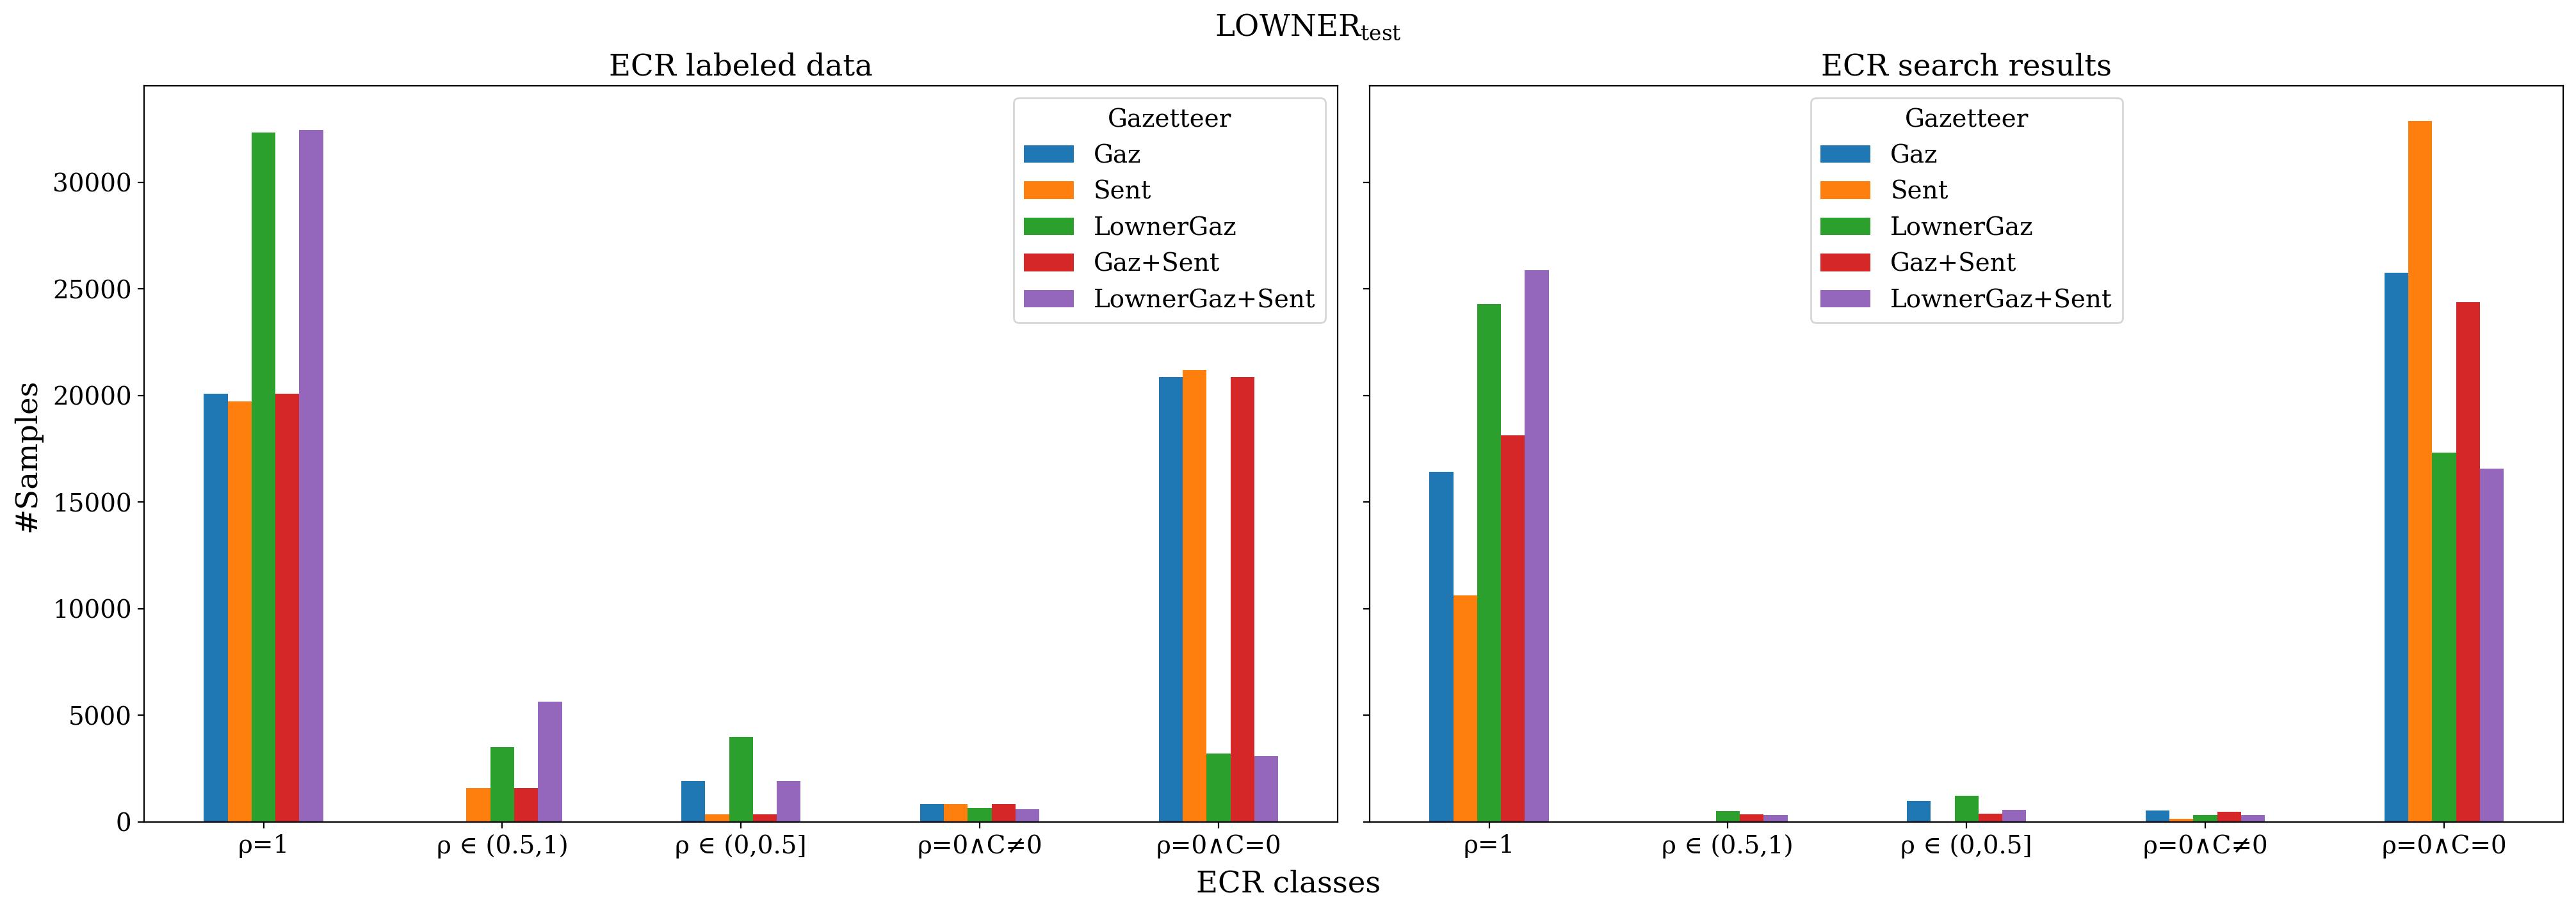

In [9]:
import matplotlib.pyplot as plt
from evaluations.datasets_00 import aggregate_per_sample_ecr_classes, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample
from evaluations.utils import PLOT_DATASET_NAMES

fig = plt.figure(figsize=(20, 7), dpi=200, layout="constrained")
fig.supylabel("#Samples")
fig.supxlabel("ECR classes")
subfigs = fig.subfigures(1, 1)
datasets = ["lowner_test"]

# for outerind, subfig in enumerate(subfigs.flat):
outerind = 0
dataset_name = datasets[outerind]
subfigs.suptitle(PLOT_DATASET_NAMES[dataset_name])
axs = subfigs.subplots(1, 2, sharey=True, sharex=True)

labeled_data_ecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_ecr_sample_df = aggregate_per_sample_ecr_classes(
    labeled_data_ecr_sample_df)

get_ecr_plotable_table(agg_labeled_data_ecr_sample_df, dataset_name).plot(
    kind="bar", ax=axs[0], title="ECR labeled data", rot=0)

search_results_data_ecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_ecr = aggregate_per_sample_ecr_classes(
    search_results_data_ecr)

get_ecr_plotable_table(agg_search_results_data_ecr,
                    dataset_name).plot(kind="bar",
                                        ax=axs[1],
                                        title="ECR search results",
                                        rot=0)

plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance",
                         "ecr_per_sample.png"),
            dpi=300,
            bbox_inches='tight')


# Gazetteer Search insights

In [10]:
from evaluations.datasets_00 import get_search_results_data_ccr_metrics

df = get_search_results_data_ccr_metrics()
df.head()

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]"
0,t5_asp_sent,lowner_dev,lowner_dev_0,7,4.760201,0.785645,6,0,0,0
1,t5_asp_sent,lowner_dev,lowner_dev_1,16,11.715183,0.747549,6,0,0,0
2,t5_asp_sent,lowner_dev,lowner_dev_2,6,3.349918,0.570941,6,0,0,0
3,t5_asp_sent,lowner_dev,lowner_dev_3,7,4.124893,0.598692,6,0,0,0
4,t5_asp_sent,lowner_dev,lowner_dev_4,9,3.767109,0.455295,0,6,0,0


In [11]:
agg_df = df.pivot_table(
    values=["total entities", "search score", "max"],
    index=["model", "dataset"],
    aggfunc=["mean", "std"])
agg_df = agg_df.sort_index(axis=1, level=1).swaplevel(0, 1,
                                                      axis=1).reset_index()
agg_df

model       dataset       max           search score  \
                                             mean       std         mean   
0              t5_asp_gaz    lowner_dev  0.421543  0.148118     2.453104   
1              t5_asp_gaz   lowner_test  0.421054  0.149016     2.436430   
2              t5_asp_gaz  lowner_train  0.419736  0.149223     2.420748   
3              t5_asp_gaz      wnut_dev  0.339132  0.137803     2.068468   
4              t5_asp_gaz     wnut_test  0.311068  0.137942     1.852150   
5              t5_asp_gaz    wnut_train  0.337994  0.115075     2.185496   
6         t5_asp_gaz_sent    lowner_dev  0.630162  0.117332     6.472730   
7         t5_asp_gaz_sent   lowner_test  0.630404  0.119572     6.495575   
8         t5_asp_gaz_sent  lowner_train  0.629319  0.119523     6.496029   
9         t5_asp_gaz_sent      wnut_dev  0.494491  0.072692     4.309388   
10        t5_asp_gaz_sent     wnut_test  0.477721  0.077362     4.018594   
11        t5_asp_gaz_sent    wnut_train  0.483733  0.066454     4.341206   
12       t5_asp_lownergaz    lowner_dev  0.467578  0.165765     3.129016   
13       t5_asp_lownergaz   lowner_test  0.468299  0.163981     3.133880   
14       t5_asp_lownergaz  lowner_train  0.465307  0.163835     3.112701   
15       t5_asp_lownergaz      wnut_dev  0.350682  0.149908     2.491061   
16       t5_asp_lownergaz     wnut_test  0.326753  0.150474     2.239744   
17       t5_asp_lownergaz    wnut_train  0.350062  0.129677     2.579221   
18  t5_asp_lownergaz_sent    lowner_dev  0.639802  0.117645     4.715671   
19  t5_asp_lownergaz_sent   lowner_test  0.639273  0.119954     4.725625   
20  t5_asp_lownergaz_sent  lowner_train  0.637648  0.119786     4.719591   
21  t5_asp_lownergaz_sent      wnut_dev  0.498372  0.074993     3.091466   
22  t5_asp_lownergaz_sent     wnut_test  0.480950  0.080096     2.894061   
23  t5_asp_lownergaz_sent    wnut_train  0.486301  0.068957     3.065294   
24            t5_asp_sent    lowner_dev  0.626621  0.117516     5.113560   
25            t5_asp_sent   lowner_test  0.626859  0.119601     5.143407   
26            t5_asp_sent  lowner_train  0.625997  0.119464     5.155388   
27            t5_asp_sent      wnut_dev  0.489744  0.070312     3.212669   
28            t5_asp_sent     wnut_test  0.473864  0.075981     3.045124   
29            t5_asp_sent    wnut_train  0.480717  0.065635     3.182724   

             total entities            
         std           mean       std  
0   1.343818      11.985146  0.360476  
1   1.328966      11.985324  0.378600  
2   1.323120      11.988229  0.334093  
3   1.106161      11.852329  1.174716  
4   1.122909      11.520591  2.217771  
5   0.939859      11.978197  0.443171  
6   2.947636      14.715389  3.647195  
7   3.076611      14.757553  3.791414  
8   3.092138      14.784474  3.830306  
9   1.310993      13.095144  2.070883  
10  1.356660      12.777001  2.192699  
11  1.495428      13.127578  2.520401  
12  1.674232      11.996435  0.206835  
13  1.658111      11.995484  0.217431  
14  1.653323      11.998436  0.111534  
15  1.406364      11.935580  0.850311  
16  1.375762      11.698524  1.759009  
17  1.185982      11.997348  0.154485  
18  2.178586       9.833333  2.699595  
19  2.210299       9.836517  2.705507  
20  2.201946       9.848618  2.702979  
21  1.015454       8.747275  1.504805  
22  0.971907       8.627040  1.344009  
23  1.093471       8.726282  1.775054  
24  2.715355       8.719846  3.641955  
25  2.860364       8.762901  3.787111  
26  2.880487       8.788572  3.826185  
27  1.089725       7.145689  1.998904  
28  1.065303       6.979021  1.848970  
29  1.332418       7.134649  2.513475

In [12]:
from evaluations.utils import merge_mean_std, DATASET_ORDER, MODEL_ORDER, LATEX_DATASET_NAMES, PLOT_SEARCH_NAMES

top_df = agg_df[agg_df["dataset"].isin(
    ["lowner_train", "lowner_dev", "lowner_test"])]


def sort_dataset_model(cell):
    if cell in DATASET_ORDER:
        return DATASET_ORDER.get(cell, 1000)
    elif cell in MODEL_ORDER:
        return MODEL_ORDER.get(cell, 1000)
    return 1000


round_last_digits = 4
top_df.sort_values(["dataset", "model"],
                   key=lambda x: x.apply(sort_dataset_model),
                   inplace=True)
top_df["Dataset"] = top_df["dataset"].apply(lambda x: LATEX_DATASET_NAMES[x])
top_df["Gazetteer"] = top_df["model"].apply(lambda x: PLOT_SEARCH_NAMES[x])
top_df["Top-1 Cosine Similarity"] = merge_mean_std(top_df, ("max", "mean"), ("max", "std"), round_last_digits)
top_df["Search score"] = merge_mean_std(top_df, ("search score", "mean"),
                                        ("search score", "std"),
                                        round_last_digits)
top_df["Entity count"] = merge_mean_std(top_df, ("total entities", "mean"),
                                        ("total entities", "std"),
                                        round_last_digits)
top_df.set_index(["Dataset", "Gazetteer"], inplace=True)
print(top_df[[
    "Top-1 Cosine Similarity", "Search score", "Entity count"
]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}ll|S[table-format = 1.4, group-minimum-digits=5]|*2{S[table-format = 1.4 (2), group-minimum-digits=5]}@{}"
))

\begin{tabular}{@{}ll|S[table-format = 1.4, group-minimum-digits=5]|*2{S[table-format = 1.4 (2), group-minimum-digits=5]}@{}}
\toprule
{} & {} & {Top-1 Cosine Similarity} & {Search score} & {Entity count} \\
{} & {} & {} & {} & {} \\
{Dataset} & {Gazetteer} & {} & {} & {} \\
\midrule
\multirow[t]{5}{*}{LOWNER\textsubscript{train}} & Gaz & 0.4197 (1492) & 2.4207 (13231) & 11.9882 (3341) \\
 & Sent & 0.6260 (1195) & 5.1554 (28805) & 8.7886 (38262) \\
 & LownerGaz & 0.4653 (1638) & 3.1127 (16533) & 11.9984 (1115) \\
 & Gaz+Sent & 0.6293 (1195) & 6.4960 (30921) & 14.7845 (38303) \\
 & LownerGaz+Sent & 0.6376 (1198) & 4.7196 (22019) & 9.8486 (27030) \\
\multirow[t]{5}{*}{LOWNER\textsubscript{dev}} & Gaz & 0.4215 (1481) & 2.4531 (13438) & 11.9851 (3605) \\
 & Sent & 0.6266 (1175) & 5.1136 (27154) & 8.7198 (36420) \\
 & LownerGaz & 0.4676 (1658) & 3.1290 (16742) & 11.9964 (2068) \\
 & Gaz+Sent & 0.6302 (1173) & 6.4727 (29476) & 14.7154 (36472) \\
 & LownerGaz+Sent & 0.6398 (1176) & 4.7157 (21

/tmp/ipykernel_40353/1511076206.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df.sort_values(["dataset", "model"],
/tmp/ipykernel_40353/1511076206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["Dataset"] = top_df["dataset"].apply(lambda x: LATEX_DATASET_NAMES[x])
/tmp/ipykernel_40353/1511076206.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

# Gazetteer EECR heatmap